## 2.3.5　決定木

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import os
import graphviz
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor

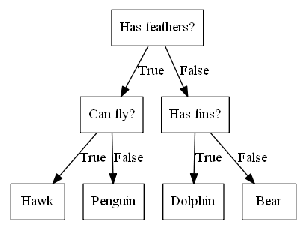

In [4]:
mglearn.plots.plot_animal_tree()

### 2.3.5.2　決定木の複雑さの制御

In [5]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

In [6]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on training set:{:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set:{:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.930


In [7]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on training set:{:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set:{:.3f}'.format(tree.score(X_train, y_train)))

Accuracy on training set:0.995
Accuracy on test set:0.995


In [8]:
for n in range(1, 6):
    tree = DecisionTreeClassifier(max_depth=n, random_state=0)
    tree.fit(X_train, y_train)
    print('training set(max_depth = {1}):{0:.3f}'.format(tree.score(X_train, y_train), n))
    print('test set(max_depth = {1}):{0:.3f}'.format(tree.score(X_train, y_train), n))

training set(max_depth = 1):0.923
test set(max_depth = 1):0.923
training set(max_depth = 2):0.946
test set(max_depth = 2):0.946
training set(max_depth = 3):0.972
test set(max_depth = 3):0.972
training set(max_depth = 4):0.995
test set(max_depth = 4):0.995
training set(max_depth = 5):0.995
test set(max_depth = 5):0.995


### 2.3.5.3　決定木の解析

In [9]:
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

malignant：悪性、benign：良性

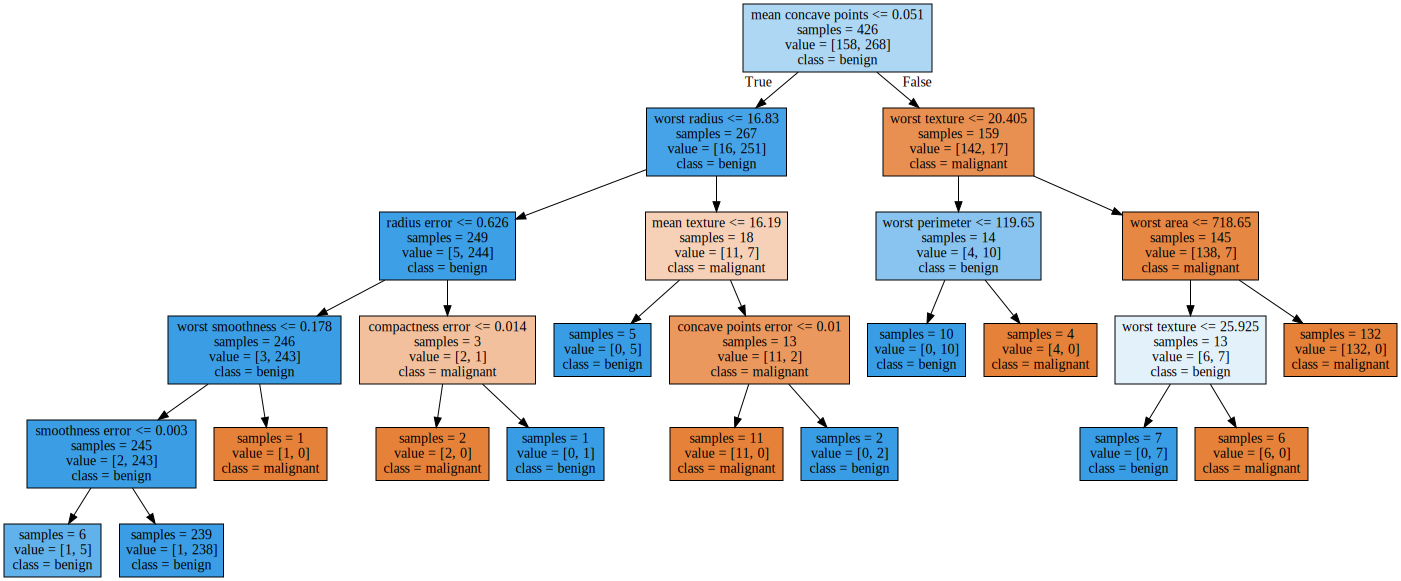

In [10]:
with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

### 2.3.5.4　決定木の特徴量の重要性

In [11]:
print('Feature importances:\n{}'.format(tree.feature_importances_))

Feature importances:
[0.         0.02649864 0.         0.         0.         0.
 0.         0.70898365 0.         0.         0.01301136 0.
 0.         0.         0.00158373 0.00683271 0.         0.01734457
 0.         0.         0.06009867 0.09115461 0.02928303 0.0351676
 0.01004143 0.         0.         0.         0.         0.        ]


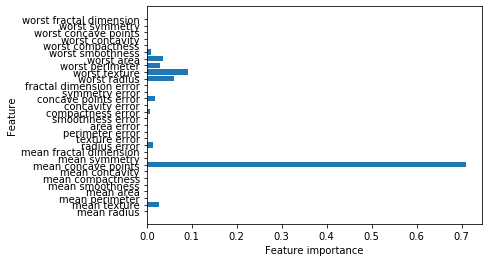

In [12]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1] # 特徴量の数
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer
               .feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


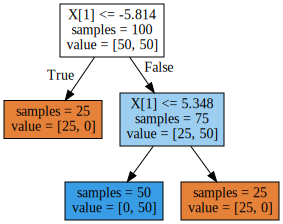

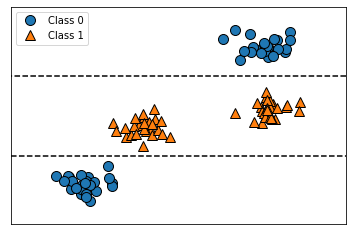

In [13]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

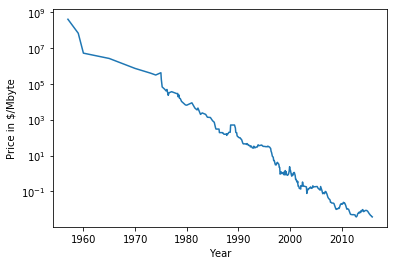

In [14]:
# 計算機メモリ（RAM）の価格履歴データ
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')

In [15]:
# 1目的変数に対して、1説明変数の単純なデータ
ram_prices.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


In [16]:
# 2000年より前はtrain、それより後はtestデータ
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date < 2000]

print(data_train.shape)
print(data_test.shape)

data_train.head()

(202, 3)
(202, 3)


,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


In [20]:
# 2000年より前をtrain、それ以降をtest
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 目的変数を対数化
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 全てのデータに対して予測
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 最後に対数化から戻すための指数化
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

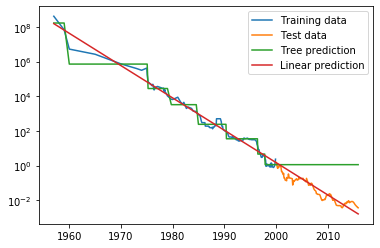

In [21]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

線形回帰はtestに対して予測をするが、決定木はtrainデータの最後の予測点を返すのみとなる。<br>

決定木において、個々の特徴量は独立に処理されるため、特徴量の正規化や標準化は不要である。<br>
また決定木は過剰適合しやすく汎化性能が低いため、決定木単体での使用をすることは少なく、アンサンブル法が用いられる。